# `NumPy`: Data Statistics
The data in [populations.txt](./populations.txt) describes the population of hares and lynxes (and carrots) in northern Canada during 20 years.
Computes and print, based on the data in populations.txt (use loadtxt to read the file)...

   1. The mean and std of the populations of each species for the years in the period.
   2. Which year each species had the largest population.
   3. Which species has the largest population for each year. (Hint: argsort & fancy indexing of np.array(['H', 'L', 'C']))
   4. Which years any of the populations is above 50000. (Hint: comparisons and np.any)
   5. The top 2 years for each species when they had the lowest populations. (Hint: argsort, fancy indexing)
   6. Compare (plot) the change in hare population (see help(np.gradient)) and the number of lynxes. Check correlation (see help(np.corrcoef)).
---
** Note ** 
... all without for-loops.
- - - 
Create a Jupyter notebook enriched text and embeded code. Upload the `.ipynb` and `.html`.

Author: Laura V. Trujillo T. [lvtrujillot@unal.edu.co](lvtrujillot@unal.edu.co)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# The pythonic way: <font color='red'>Without</font>  `for` loop

In [2]:
d1 = np.loadtxt("populations.txt")
species = np.array(['H', 'L', 'C'])

## 1. Mean $\mu$ and Standard Deviation $\sigma$ 
The mean and std of the populations of each species for the years in the period.

In [3]:
h_mean, l_mean, c_mean = np.mean(d1[:, 1]), np.mean(d1[:, 2]), np.mean(d1[:, 3])
mean_pop = [h_mean, l_mean, c_mean]

# For loop just for printing !
for i in range(0, len(species)):
    print("{} mean:".format(species[i]),'{:06.2f}'.format(mean_pop[i]), "\n")

H mean: 34080.95 

L mean: 20166.67 

C mean: 42400.00 



In [4]:
h_sd, l_sd, c_sd = np.std(d1[:, 1]), np.std(d1[:, 2]), np.std(d1[:, 3])
std_pop = [h_sd, l_sd, c_sd
          ]
# For loop just for printing !
for i in range(0, len(species)):
    print("{} std:".format(species[i]),'{:06.2f}'.format(std_pop[i]), "\n")

H std: 20897.91 

L std: 16254.59 

C std: 3322.51 



## 2. Year with largest population for each species
Which year each species had the largest population

In [5]:
hmax = np.argwhere(d1 == d1[:, 1].max())[0][0]
lmax = np.argwhere(d1 == d1[:, 2].max())[0][0]
cmax = np.argwhere(d1 == d1[:, 3].max())[0][0]
max_pop = [hmax, lmax, cmax]

# For loop just for printing !
for i in range(0, len(species)):
    print("Year for max {}:".format(species[i]), int(d1[max_pop[i]][0]), "\n")

Year for max H: 1903 

Year for max L: 1904 

Year for max C: 1900 



## 3. Species with largest population each year
Which species has the largest population for each year. 
- - - 
**Hint**: `argsort` & fancy indexing of `np.array(['H', 'L', 'C']))`
- - -

In [6]:
max_species = species[np.argsort(d1[:, [1, 2, 3]])[:, -1]]
np.append(d1[:, [0]], max_species.reshape(21,1), axis = 1 )

array([['1900.0', 'C'],
       ['1901.0', 'C'],
       ['1902.0', 'H'],
       ['1903.0', 'H'],
       ['1904.0', 'L'],
       ['1905.0', 'L'],
       ['1906.0', 'C'],
       ['1907.0', 'C'],
       ['1908.0', 'C'],
       ['1909.0', 'C'],
       ['1910.0', 'C'],
       ['1911.0', 'C'],
       ['1912.0', 'H'],
       ['1913.0', 'H'],
       ['1914.0', 'H'],
       ['1915.0', 'L'],
       ['1916.0', 'C'],
       ['1917.0', 'C'],
       ['1918.0', 'C'],
       ['1919.0', 'C'],
       ['1920.0', 'C']], dtype='<U32')

## 4. Population above $50000$
Which years any of the populations is above $50000$. 
- - -
**Hint**: comparisons and `np.any`
- - -

>Another way to do it: `np.any([d1[:,1] > 5e4, d1[:, 2] > 5e4, d1[:, 3] > 5e4], axis = 0)`

In [7]:
y = np.any([d1[:, [1, 2, 3]] > 5e4], axis=2)[0]
d1[:, 0][np.where(y == True)]

array([1902., 1903., 1904., 1912., 1913., 1914., 1915.])

## 5. Top 2 years for lowest population
The top 2 years for each species when they had the lowest populations. 
- - -
Hint: `argsort`, fancy indexing
- - -

In [8]:
hmin = np.argsort(d1[:, 1])[0:2]
lmin = np.argsort(d1[:, 2])[0:2]
cmin = np.argsort(d1[:, 3])[0:2]

min_pop = np.array([hmin, lmin, cmin])

# For loop just for printing !
for i in range(0, len(species)):
    print("Top 2 Years for lowest {}:".format(species[i]), d1[:, 0][min_pop[i]], "\n")

Top 2 Years for lowest H: [1917. 1916.] 

Top 2 Years for lowest L: [1900. 1901.] 

Top 2 Years for lowest C: [1916. 1903.] 



#### Summary

| Population      | $\mu$  | $\sigma$  | Year for max | Years for min |
| ------------- |:-------------:| --------:| -----:|-------:|
| Hare     | 34080.95 | 20897.91 | 1903 | 1917 & 1916 |
| Lynx     | 20166.67 | 16254.59 | 1904 | 1900 & 1901 |
| Carrot | 42400.00 | 3322.51 | 1900 | 1916 & 1903 |
 


## 6.  Plots and correlation
Plot the change in hare population and the number of lynxes. Check correlation (see help(np.corrcoef)).

> See [`np.gradient()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.gradient.html) and [`np.corrcoef()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html)

In [80]:
H, L  = d1[:, 1], d1[:, 2]
#h, l = np.meshgrid(H, L)
Y, X = np.gradient(H), np.gradient(L)

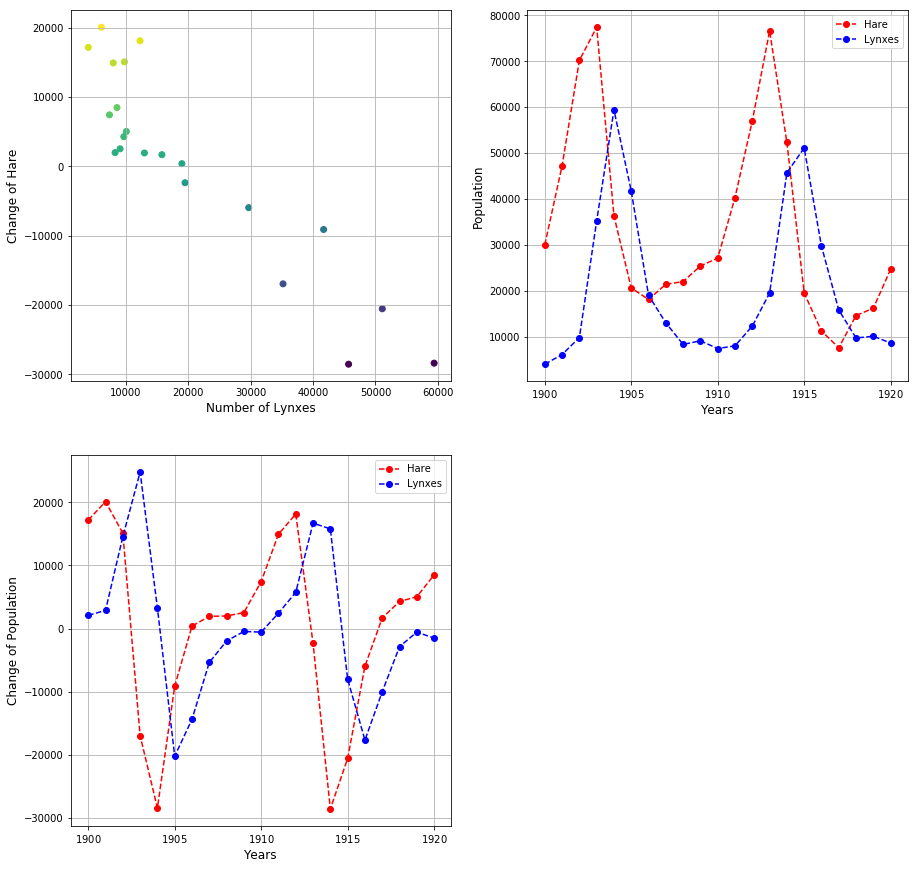

In [81]:
cm = plt.cm.get_cmap('viridis')
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.scatter(L, Y, c=Y, cmap=cm)
plt.xlabel("Number of Lynxes", fontsize=12)
plt.ylabel("Change of Hare", fontsize=12)
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(d1[:, 0], H, "r--o", label="Hare")
plt.plot(d1[:, 0], L, "b--o", label="Lynxes")
plt.xticks([1900,1905, 1910, 1915, 1920],
          [r'$1900$', r'$1905$', r'$1910$', r'$1915$', r'$1920$'])
plt.xlabel("Years", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.grid()
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(d1[:, 0], Y, "r--o", label="Hare")
plt.plot(d1[:, 0], X, "b--o", label="Lynxes")
plt.xlabel("Years", fontsize=12)
plt.ylabel("Change of Population", fontsize=12)

plt.xticks([1900,1905, 1910, 1915, 1920],
          [r'$1900$', r'$1905$', r'$1910$', r'$1915$', r'$1920$'])

#plt.yticks([-3e4, 0, +2e4],
 #         [r'$-3e4$', r'$0$', r'$2e4$'])
plt.grid()
plt.legend()

plt.show()

In [87]:
np.corrcoef(L, np.gradient(H))

array([[ 1.        , -0.91792485],
       [-0.91792485,  1.        ]])

Correlation $-0.9179$ negative and close to $1$  

- - -
**Note** : Don't know if there's a fancy way to plot the gradient of hare population. I would love to know if there is any.

Thanks.


- - -